In [1]:
import os
import glob

%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
def print_test_from_filename(test_name):
    fpath = os.path.join(os.getcwd(), "datasets", test_name + ".tsp")
    
    if not os.path.isfile(fpath):
        print('File does not exist.')
    else:
        with open(fpath) as f:
            content = f.read().splitlines()
        
        start = 0;
        for i in range(len(content)):
            content[i] = content[i].strip()
                    
        for i in range(len(content)):
            if content[i] == "NODE_COORD_SECTION":
                start = i + 1;
                
        if start == 0:
            return None;
        return content[start:-1]
    
def print_test_from_filepath(fpath):    
    if not os.path.isfile(fpath):
        print('File does not exist.')
    else:
        with open(fpath) as f:
            content = f.read().splitlines()
            
        
        start = 0;
        content_size = 0;
        for i in range(len(content)):
            content[i] = content[i].strip()
            
            tokens = content[i].split(":")
            for token in tokens:
                token = token.strip()
            
            if tokens[0] == "DIMENSION":
                content_size = int(tokens[1])
            
            if content[i] == "NODE_COORD_SECTION":
                start = i + 1;
                break;
                
        if start == 0:
            return None;
        
        content = content[start:]
    
        if content_size != len(content):
            new_content = []
            for line in content:
                if line != "EOF" and len(line) > 4:
                    new_content.append(line)
            return new_content
        
        return content
    

In [5]:
def get_x_and_y(content, fpath):
    x = []
    y = []
    for line in content:
        tokens = line.split()
        if (len(tokens) != 3):
            print("invalid tokens: ", fpath, tokens)
        x.append(float(tokens[1]))
        y.append(float(tokens[2]))
        
    return x, y



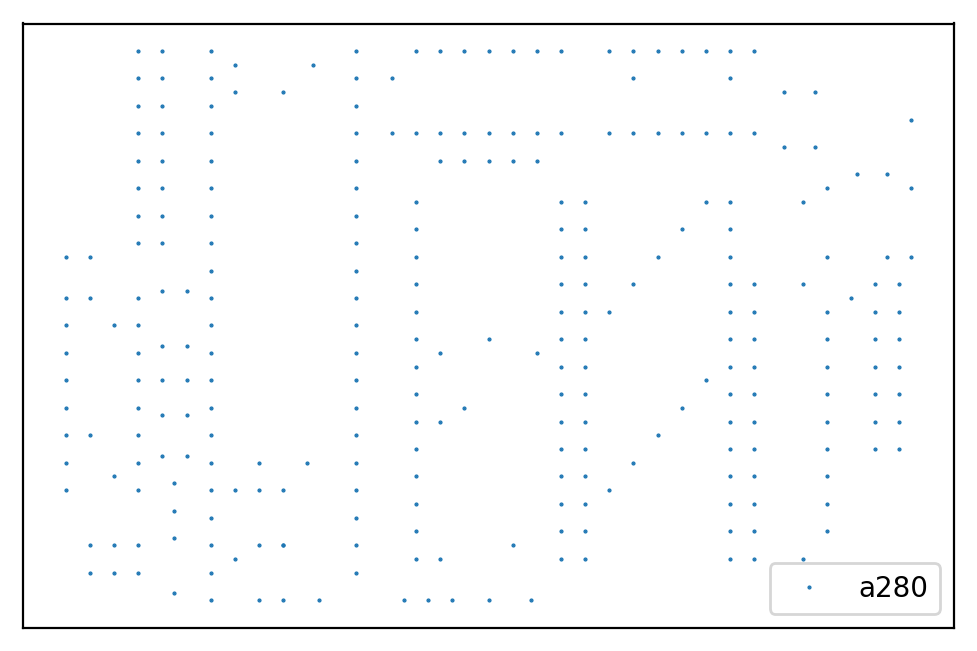

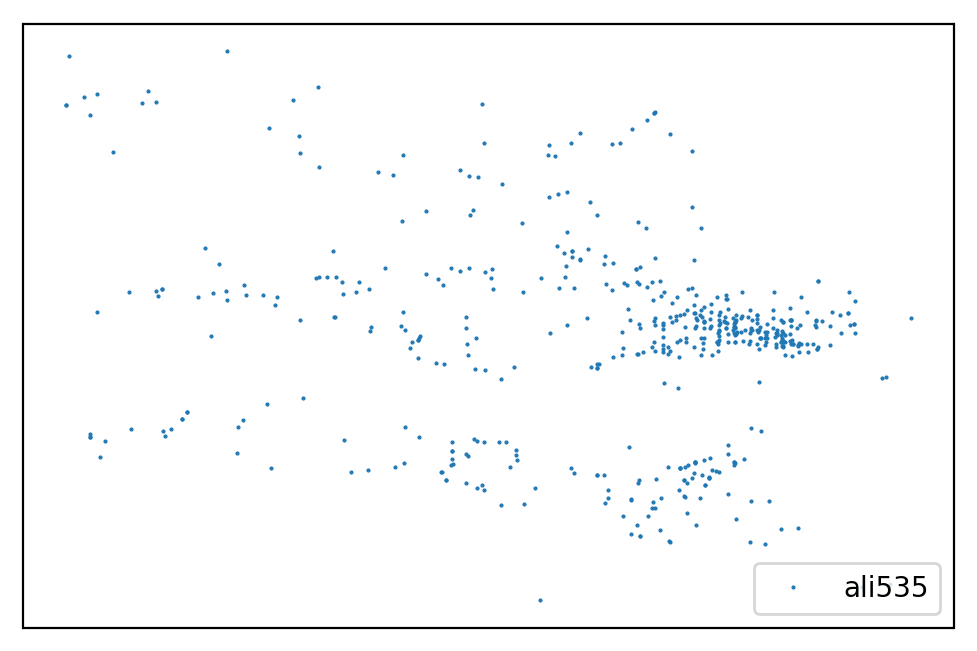

In [4]:
all_test_paths = sorted(glob.glob(os.path.join(os.getcwd(), "datasets", "*.tsp")))
tests_amount = len(all_test_paths)
tests_amount = 2

for i in range(tests_amount):
    points = print_test_from_filepath(all_test_paths[i])
    test_name = all_test_paths[i].split("/")[-1][:-4];
    if (points != None):
        x, y = get_x_and_y(points, all_test_paths[i])

        fig, ax = plt.subplots(dpi=200)
        
        plt.plot(x, y, 'o', marker='.', markersize=1, scalex=True, scaley=True, label=test_name)
        plt.legend(loc='lower right')
        plt.xticks([], [])
        plt.yticks([], [])
        plt.show()
    else:
        print("matrix in test {}".format(test_name))
        
        

In [6]:
def print_tour_from_filepath(fpath):    
    if not os.path.isfile(fpath):
        print('File does not exist.')
    else:
        with open(fpath) as f:
            content = f.read().splitlines()
            
        
        start = 0;
        content_size = 0;
        for i in range(len(content)):
            content[i] = content[i].strip()
            
            tokens = content[i].split(":")
            for token in tokens:
                token = token.strip()
            
            if tokens[0] == "DIMENSION":
                content_size = int(tokens[1])
            
            if content[i] == "TOUR_SECTION":
                start = i + 1;
                break;
                
        if start == 0:
            return None;
        
        content = content[start:]
    
        if content_size != len(content):
            new_content = []
            for line in content:
                if line != "EOF" and int(line) != -1:
                    new_content.append(line)
                    
            print("size ", len(new_content), content_size)
            return new_content
        
        return content

In [11]:
def plot_tour_by_testname_and_solution(testname, solution):
    tour_path = sorted(glob.glob(os.path.join(os.getcwd(), "datasets", testname + ".opt.tour")))[-1]
    solution_tour_path = sorted(glob.glob(os.path.join(os.getcwd(), "results", 
                                                       testname + "_" + solution + "_" + "*.tour")), key=str.lower)[-1]
    
    test_path = sorted(glob.glob(os.path.join(os.getcwd(), "datasets", testname + ".tsp")))[-1]
    print(solution_tour_path, tour_path, test_path)

    points = print_test_from_filepath(test_path)
    permute = print_tour_from_filepath(tour_path)
    our_permute = print_tour_from_filepath(solution_tour_path)

#     test_name = all_test_paths[i].split("/")[-1][:-4]
#     tour_name = all_tour_paths[j].split("/")[-1][:-9]
#     our_tour_name = all_our_tour_paths[j].split("/")[-1].split("_")[0]


    if(tour_path == None or solution_tour_path == None or test_path == None):
        print("smth is None")
        print(test_path, tour_path, solution_tour_path)
        return 

    if (points != None):
        x, y = get_x_and_y(points, test_path)
        new_x = []
        new_y = []
        for index in permute:
            v = int(index)
            new_x.append(x[v - 1])
            new_y.append(y[v - 1])
        new_x.append(new_x[0])
        new_y.append(new_y[0])

        our_x = []
        our_y = []
        for index in our_permute:
            v = int(index)
            our_x.append(x[v - 1])
            our_y.append(y[v - 1])
        our_x.append(new_x[0])
        our_y.append(new_y[0])

        fig, ax = plt.subplots(dpi=200)

        plt.plot(new_x, new_y, 
                 linewidth=0.1, 
                 marker='.', markersize=1, 
                 color="red",
                 markeredgecolor="green",
                 label=testname)

        plt.plot(our_x, our_y, 
                 linewidth=0.1, 
                 marker='.', markersize=1, 
                 color="blue",
                 markeredgecolor="green",
                 label=testname)

        plt.legend(loc='lower right')
        plt.xticks([], [])
        plt.yticks([], [])
        plt.show()
    else:
        print("matrix in test {}".format(testname))
            
    

# todo: search by test name all solution in results
# todo: table with (optimizer solution test)


/Users/gwyrwch/Projects/course-work-5/results/a280_NearestNeighbour_13.tour /Users/gwyrwch/Projects/course-work-5/datasets/a280.opt.tour /Users/gwyrwch/Projects/course-work-5/datasets/a280.tsp
size  280 0
size  280 280


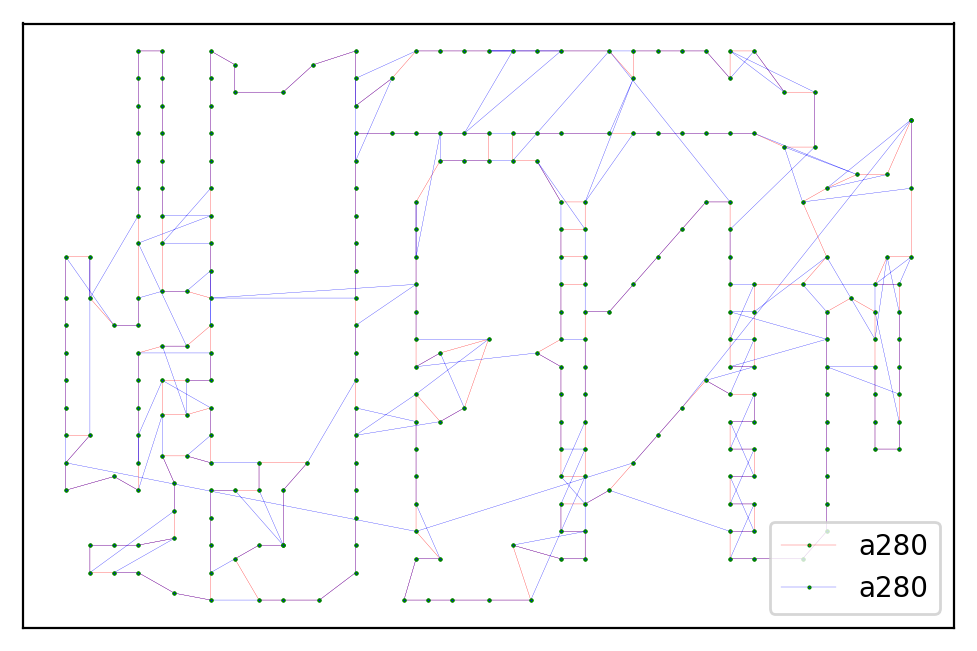

In [12]:
plot_tour_by_testname_and_solution('a280', 'NearestNeighbour')


/Users/gwyrwch/Projects/course-work-5/results/a280_MinimumSpanningTree_3.tour /Users/gwyrwch/Projects/course-work-5/datasets/a280.opt.tour /Users/gwyrwch/Projects/course-work-5/datasets/a280.tsp
size  280 0
size  280 280


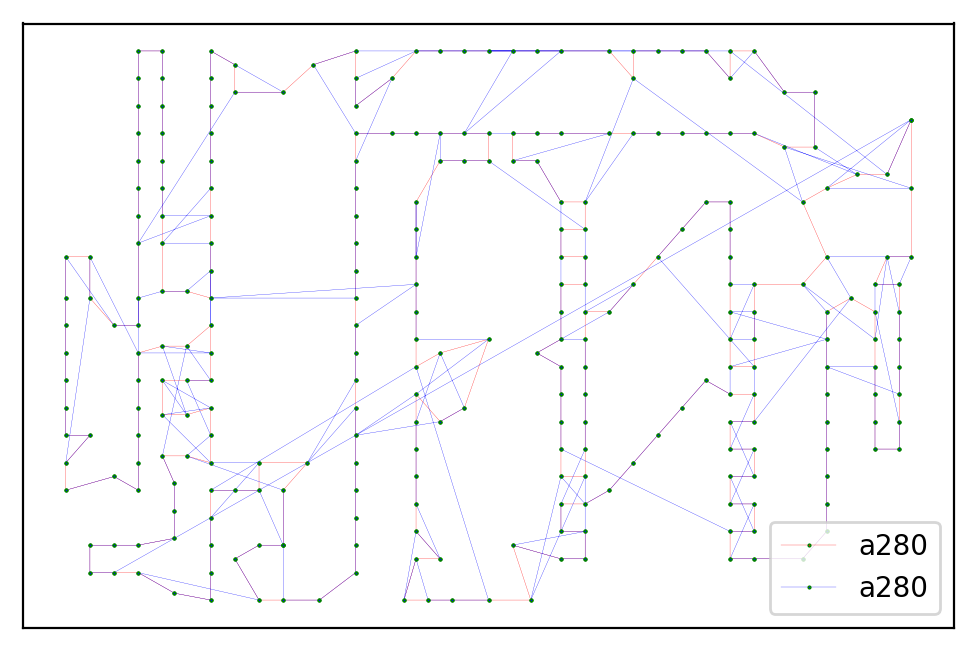

In [13]:
plot_tour_by_testname_and_solution('a280', 'MinimumSpanningTree')
